<a href="https://colab.research.google.com/github/anuradha-datascience/deep-learning/blob/main/ANN_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [233]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [234]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [235]:
# Divide the dataset into independent and dependent feature
X= dataset.iloc[:,3:13]


In [236]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [237]:
y= dataset.iloc[:,13]

In [238]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [239]:
# Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [240]:
## Concatenate with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [241]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [242]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [243]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [244]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [245]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [246]:
X_train.shape

(8000, 11)

In [247]:
## Part 2 - Let's create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [248]:
## Droput layer(for solving overfitting)
## Let's initialize the ANN
classifier=Sequential()

## Add the input layer
classifier.add(Dense(units=11,activation='relu'))

In [249]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [250]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [251]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [252]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [253]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [254]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [255]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.6069 - accuracy: 0.7199 - val_loss: 0.4922 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4567 - accuracy: 0.8076 - val_loss: 0.4195 - val_accuracy: 0.8209
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4146 - accuracy: 0.8294 - val_loss: 0.3960 - val_accuracy: 0.8323
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3907 - accuracy: 0.8395 - val_loss: 0.3813 - val_accuracy: 0.8398
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3836 - accuracy: 0.8412 - val_loss: 0.3726 - val_accuracy: 0.8425
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3789 - accuracy: 0.8391 - val_loss: 0.3704 - val_accuracy: 0.8417
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3728 - accuracy: 0.8447 - val_loss: 0.3677 - val_accuracy:

In [256]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

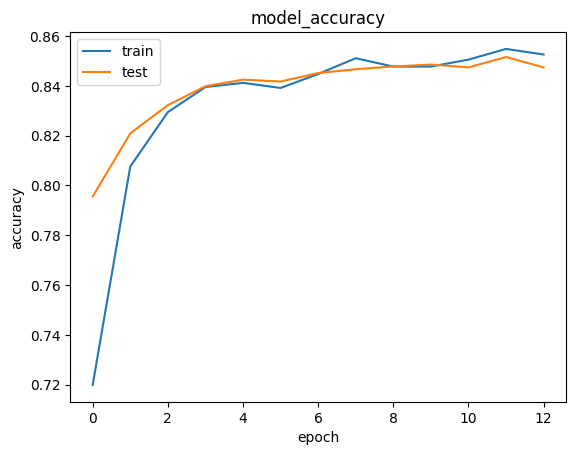

In [257]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

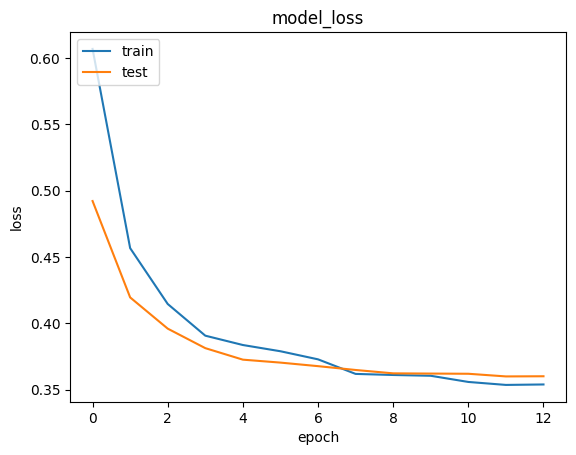

In [258]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

In [259]:
# Part 3 - Making the predictions and evaluating the model
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [260]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[1540,   55],
       [ 224,  181]])

In [261]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8605

In [262]:
# # get the weights
# classifier.get_weights()